In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
T = 100.0
dt = 0.01
N = int(T/dt)+1
t = np.linspace(0.0, T, N)
tchallenge = np.arange(0., T, dt)

### Challenge 1

Write code in 2nd cell using numpy.arange instead of linspace.
Need to increase T by dt in order to get the right size:

In [77]:
T = 100.0
dt = 0.01
N = int(T/dt)+1
tchallenge = np.arange(0., T+dt, dt)

Check to see that the "grids" are the same size:

In [58]:
len(tchallenge) == len(t)

True

Moving forward with the problem:

In [80]:
#initial conditions:
z0 = 100. #altitude
b0 = 10  #upward velocity resulting from gust
zt = 100. #mean height
g = 9.81  #acceleration due to gravity

u = np.array([z0, b0])

# initialize an array to hold the changing elevation values:
z = np.zeros(N) 
z[0] = z0  #sets first elevation value to initial elevation

Now step through the time grid and record solutions:

This is an interesting way to do this, u is replaced by u + dt x f(t) everytime through the loop.

In [81]:
#time-loop using Euler's Method:
for n in range(1,N):
    u = u + dt*np.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

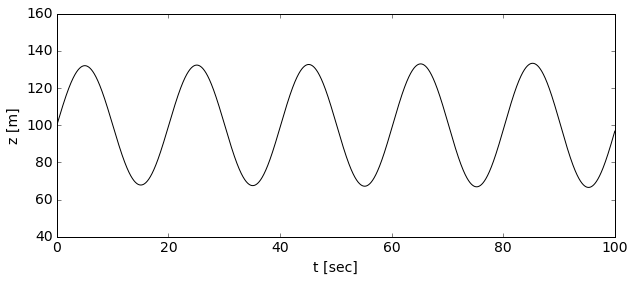

In [82]:
plt.figure(figsize=(10,4)) #sets plot size  
plt.ylim(40,160)           #y-axis plot limits
plt.tick_params(axis='both', labelsize=14) #increase font size for ticks
plt.xlabel('t [sec]', fontsize=14) #xlabel
plt.ylabel('z [m]', fontsize=14) #ylabel
plt.plot(t,z, 'k-')

Exact solution:

In [83]:
z_exact = b0*np.sqrt(zt/g)*np.sin(np.sqrt(g/zt)*t)+(z0-zt)*np.cos(np.sqrt(g/zt)\
                            *t)+zt

Plot both solutions:

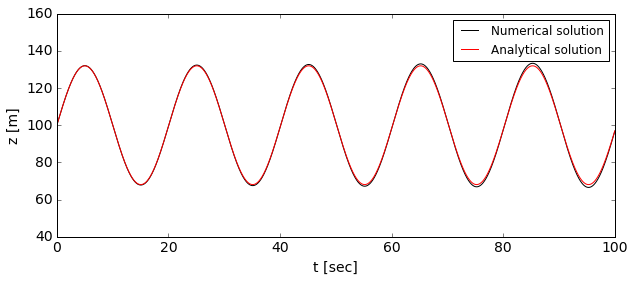

In [84]:
plt.figure(figsize=(10,4)) #sets plot size  
plt.ylim(40,160)           #y-axis plot limits
plt.tick_params(axis='both', labelsize=14) #increase font size for ticks
plt.xlabel('t [sec]', fontsize=14) #xlabel
plt.ylabel('z [m]', fontsize=14) #ylabel
plt.plot(t,z, 'k-')
plt.plot(t,z_exact, 'r-')
plt.legend(['Numerical solution','Analytical solution'])

### Checking for convergence
Rewriting all code above in one cell for convenience:

In [ ]:
T = 100.0
dt = 0.01
N = int(T/dt)+1
t = np.linspace(0.0, T, N)
tchallenge = np.arange(0., T, dt)

#initial conditions:
z0 = 100. #altitude
b0 = 10  #upward velocity resulting from gust
zt = 100. #mean height
g = 9.81  #acceleration due to gravity
u = np.array([z0, b0])

# initialize an array to hold the changing elevation values:
z = np.zeros(N) 
z[0] = z0  #sets first elevation value to initial elevation

#time-loop using Euler's Method:
for n in range(1,N):
    u = u + dt*np.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

#exact solution:
z_exact = b0*np.sqrt(zt/g)*np.sin(np.sqrt(g/zt)*t)+(z0-zt)*np.cos(np.sqrt(g/zt)\
                            *t)+zt

#plotting:
plt.figure(figsize=(10,4)) #sets plot size  
plt.ylim(40,160)           #y-axis plot limits
plt.tick_params(axis='both', labelsize=14) #increase font size for ticks
plt.xlabel('t [sec]', fontsize=14) #xlabel
plt.ylabel('z [m]', fontsize=14) #ylabel
plt.plot(t,z, 'k-')
plt.plot(t,z_exact, 'r-')
plt.legend(['Numerical solution','Analytical solution'])

Calculating convergence things:

In [85]:
#time-increment array
dt_values = np.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

#array that will contain solution of each grid
z_values = np.empty_like(dt_values, dtype=np.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1 # number of time steps
    # discritize the time using np.linspace()
    t = np.linspace(0., T, N)
    
    #initial conditions
    u = np.array([z0,b0])
    z = np.empty_like(t)
    z[0] = z0
    
    #time loop - Euler method
    for n in range(1,N):
        # compute next solution using Euler's method
        u = u + dt*np.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0] # store the elevation at time step n+1
        
    z_values[i] = z.copy() #store the total elevation grid i
    

Write function for calculating the error for each time increment

In [88]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using the L-1 norm
    
    Parameters
    -----------
    z: array of float numerical solution.
    dt: float time increment.
    
    Returns:
    --------
    err : float
          L_{1} norm of the error with respect to the exact solution
    """
    N = len(z)
    t = np.linspace(0., T, N)
    
    z_exact = b0*np.sqrt(zt/g)*np.sin(np.sqrt(g/zt)*t)+(z0-zt)*np.cos(np.sqrt(g/zt)\
                            *t)+zt
    
    return dt * np.sum(np.abs(z-z_exact))

iterate through each dt value and calculate the corresponding error:

In [92]:
error_values = np.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    #call our get_error function:
    error_values[i] = get_error(z_values[i], dt)

Plot the errors in a log-log plot:

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

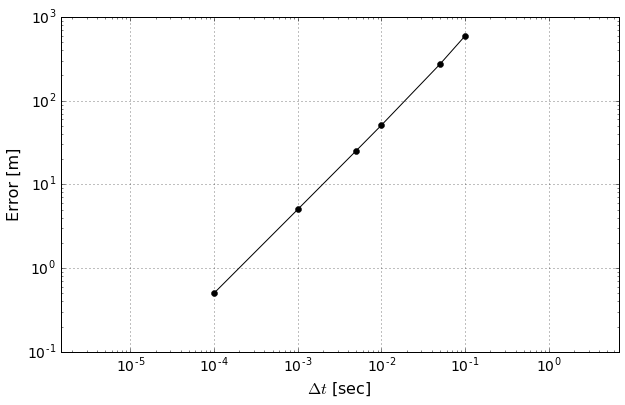

In [95]:
plt.figure(figsize=(10,6))
plt.tick_params(axis='both', labelsize=14) #increase tick font size
plt.grid(True)
plt.xlabel('$\Delta t$ [sec]', fontsize=16)
plt.ylabel('Error [m]', fontsize=16)
plt.loglog(dt_values, error_values, 'ko-')
plt.axis('equal')

This is good, as dt gets smaller, so too does the error!

# Challenge at the bottom

This is my funtion for the Euler method:

In [104]:
def euler(T, dt, z0, b0, zt, g):
    #initialize things
    N = int(T/dt)+1
    t = np.linspace(0.0, T, N)
    u = np.array([z0, b0])

    # initialize an array to hold the changing elevation values:
    z = np.zeros(N) 
    z[0] = z0  #sets first elevation value to initial elevation
   
    #Perform the Euler Method
    for n in range(1,N):
        # compute next solution using Euler's method
        u = u + dt*np.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0] # store the elevation at time step n+1
    return z

Re-writing the error analysis cell to use my euler function. It seeme to work fine.

In [102]:
#time-increment array
dt_values = np.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

#array that will contain solution of each grid
z_values = np.empty_like(dt_values, dtype=np.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1 # number of time steps
    # discritize the time using np.linspace()
    t = np.linspace(0., T, N)
    
    #initialize values:
    T = 100.0
    dt = 0.01
    
    #initial conditions:
    z0 = 100. #altitude
    b0 = 10  #upward velocity resulting from gust
    zt = 100. #mean height
    g = 9.81  #acceleration due to gravity
    
    #time loop - Euler method
    z = euler(T, dt, z0, b0, zt, g)
        
    z_values[i] = z.copy() #store the total elevation grid i

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

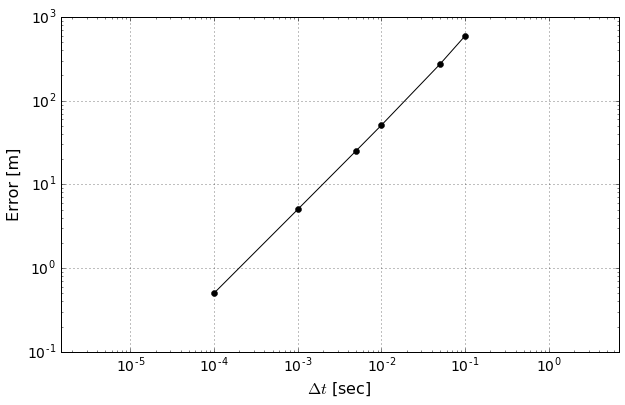

In [103]:
plt.figure(figsize=(10,6))
plt.tick_params(axis='both', labelsize=14) #increase tick font size
plt.grid(True)
plt.xlabel('$\Delta t$ [sec]', fontsize=16)
plt.ylabel('Error [m]', fontsize=16)
plt.loglog(dt_values, error_values, 'ko-')
plt.axis('equal')